Run this code in collab

In [91]:
# Install Clustal Omega via biopython wrapper
# Step 1: Install Biopython
!pip install biopython
!apt-get install clustalo
!pip install logomaker

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [92]:
# Step 2: Fetch protein sequence from UniProt
from Bio import ExPASy
from Bio import SwissProt
from Bio import SeqIO
from Bio import Entrez

from Bio import SeqIO
from urllib.request import urlopen
from Bio.Align.Applications import ClustalOmegaCommandline

In [93]:
# Example: Human Hemoglobin subunit beta (UniProt ID: P68871)
url = "https://www.uniprot.org/uniprot/P68871.fasta"
fasta_data = urlopen(url).read().decode("utf-8")
print(fasta_data)

>sp|P68871|HBB_HUMAN Hemoglobin subunit beta OS=Homo sapiens OX=9606 GN=HBB PE=1 SV=2
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPK
VKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFG
KEFTPPVQAAYQKVVAGVANALAHKYH



In [94]:
# Save to a file
with open("target_protein.fasta", "w") as f:
    f.write(fasta_data)


In [95]:
from urllib.request import urlopen

# List of UniProt IDs for hemoglobin beta chains
uniprot_ids = {
    "Human_HBB": "P68871",
    "Mouse_HBB": "P02088",
    "Pig_HBB": "P02093",
    "Horse_HBB": "P02081",
    "Rabbit_HBB": "P02103"
}

# Write all sequences to one FASTA file
with open("multi_seq.fasta", "w") as file:
    for name, uid in uniprot_ids.items():
        url = f"https://www.uniprot.org/uniprot/{uid}.fasta"
        fasta = urlopen(url).read().decode("utf-8")
        # Add custom header (optional): >Species_ID
        fasta = fasta.replace(">", f">{name}_")  # Add species prefix
        file.write(fasta + "\n")

print("✅ multi_seq.fasta created with multiple sequences.")

✅ multi_seq.fasta created with multiple sequences.


In [96]:
# Read and print the contents
with open("multi_seq.fasta", "r") as f:
    print(f.read())

>Human_HBB_sp|P68871|HBB_HUMAN Hemoglobin subunit beta OS=Homo sapiens OX=9606 GN=HBB PE=1 SV=2
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPK
VKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFG
KEFTPPVQAAYQKVVAGVANALAHKYH

>Mouse_HBB_sp|P02088|HBB1_MOUSE Hemoglobin subunit beta-1 OS=Mus musculus OX=10090 GN=Hbb-b1 PE=1 SV=2
MVHLTDAEKAAVSCLWGKVNSDEVGGEALGRLLVVYPWTQRYFDSFGDLSSASAIMGNAK
VKAHGKKVITAFNDGLNHLDSLKGTFASLSELHCDKLHVDPENFRLLGNMIVIVLGHHLG
KDFTPAAQAAFQKVVAGVATALAHKYH

>Pig_HBB_sp|P02093|HBB_ONDZI Hemoglobin subunit beta OS=Ondatra zibethicus OX=10060 GN=HBB PE=1 SV=2
VHLTDAEKAAISGLWGKVNADGVGAEALGRLLVVYPWTQRFFEHFGDLSSSSAVMGNAKV
KSHGKKVITAFADGLKHLDNLKGTFSALSELHCDKLHVDPENFKLLGNMIVIVLSHDLGK
DFTPDAQSAFQKVVTGVATALGHKYH

>Horse_HBB_sp|P02081|HBBF_BOVIN Hemoglobin fetal subunit beta OS=Bos taurus OX=9913 PE=1 SV=1
MLSAEEKAAVTSLFAKVKVDEVGGEALGRLLVVYPWTQRFFESFGDLSSADAILGNPKVK
AHGKKVLDSFCEGLKQLDDLKGAFASLSELHCDKLHVDPENFRLLGNVLVVVLARRFGSE
FSPELQASFQKVVTGVANALAHRYH

>Rabb

In [97]:
from Bio.Align.Applications import ClustalOmegaCommandline

clustalomega_cline = ClustalOmegaCommandline(
    infile="multi_seq.fasta",
    outfile="aligned.aln",
    verbose=True,
    auto=True,
    outfmt="clustal"  # <- add this to get true CLUSTAL format
)

stdout, stderr = clustalomega_cline()

In [98]:
alignment = AlignIO.read("aligned.aln", "clustal")
print(alignment)

Alignment with 5 rows and 147 columns
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFE...KYH Human_HBB_sp|P68871|HBB_HUMAN
MVHLTDAEKAAVSCLWGKVNSDEVGGEALGRLLVVYPWTQRYFD...KYH Mouse_HBB_sp|P02088|HBB1_MOUSE
-VHLTDAEKAAISGLWGKVNADGVGAEALGRLLVVYPWTQRFFE...KYH Pig_HBB_sp|P02093|HBB_ONDZI
--MLSAEEKAAVTSLFAKVKVDEVGGEALGRLLVVYPWTQRFFE...RYH Horse_HBB_sp|P02081|HBBF_BOVIN
MVHFTPEEKCIISKQWGQVNIDETGGEALGRLLVVYPWTQRFFD...KYH Rabbit_HBB_sp|P02103|HBE_RABIT


In [99]:
from Bio import AlignIO

alignment = AlignIO.read("aligned.aln", "clustal")

# Print in CLUSTAL format to cell output
from io import StringIO
from Bio.Align import AlignInfo

# Write to a string in CLUSTAL format
from Bio import AlignIO
from io import StringIO

output = StringIO()
AlignIO.write(alignment, output, "clustal")
clustal_text = output.getvalue()

print(clustal_text)

CLUSTAL X (1.81) multiple sequence alignment


Human_HBB_sp|P68871|HBB_HUMAN       MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLS
Mouse_HBB_sp|P02088|HBB1_MOUSE      MVHLTDAEKAAVSCLWGKVNSDEVGGEALGRLLVVYPWTQRYFDSFGDLS
Pig_HBB_sp|P02093|HBB_ONDZI         -VHLTDAEKAAISGLWGKVNADGVGAEALGRLLVVYPWTQRFFEHFGDLS
Horse_HBB_sp|P02081|HBBF_BOVIN      --MLSAEEKAAVTSLFAKVKVDEVGGEALGRLLVVYPWTQRFFESFGDLS
Rabbit_HBB_sp|P02103|HBE_RABIT      MVHFTPEEKCIISKQWGQVNIDETGGEALGRLLVVYPWTQRFFDNFGNLS
                                       ::  **. ::  :.:*: * .*.***************:*: **:**

Human_HBB_sp|P68871|HBB_HUMAN       TPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVD
Mouse_HBB_sp|P02088|HBB1_MOUSE      SASAIMGNAKVKAHGKKVITAFNDGLNHLDSLKGTFASLSELHCDKLHVD
Pig_HBB_sp|P02093|HBB_ONDZI         SSSAVMGNAKVKSHGKKVITAFADGLKHLDNLKGTFSALSELHCDKLHVD
Horse_HBB_sp|P02081|HBBF_BOVIN      SADAILGNPKVKAHGKKVLDSFCEGLKQLDDLKGAFASLSELHCDKLHVD
Rabbit_HBB_sp|P02103|HBE_RABIT      SSSAIMGNPKVKAHGKKVLTSFGDAIKNMDNLKGAFAKLSELHCDK

In [100]:
print("Number of sequences:", len(alignment))
print("Alignment length:", alignment.get_alignment_length())

Number of sequences: 5
Alignment length: 147


/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character '-' is not in color_dict. Using black.
  warnings.warn(str(Error))


Text(0, 0.5, 'Count')

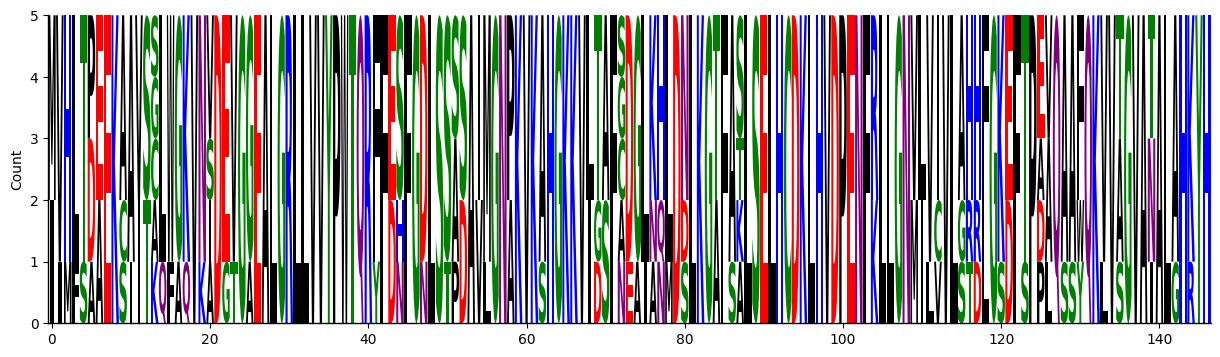

In [101]:
import pandas as pd
import logomaker
from Bio.Align import MultipleSeqAlignment

# Convert alignment to list of strings
alignment_strs = [str(record.seq) for record in alignment]

# Convert to pandas DataFrame
df = pd.DataFrame([list(seq) for seq in alignment_strs])
counts_df = df.apply(lambda x: x.value_counts(), axis=0).fillna(0)
logo_df = counts_df.T

# Create color logo plot
logo = logomaker.Logo(logo_df, figsize=(15, 4), color_scheme='chemistry')

# Optional: add axis labels
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.ax.set_ylabel("Count")

A sequence logo represents the conservation and variability at each position in a multiple sequence alignment:

	•	Height of the stack = Information content at that position (how conserved it is)
	•	Height of each letter in the stack = Relative frequency of that amino acid
	•	Color of each amino acid = Based on chemical properties (Logomaker default)

✅ Highly Conserved Regions (High Stacks)

Positions with tall stacks and single large letters indicate conservation:

	•	Residues like:
	•	V, L, H, G, F, D, E, K dominate certain positions.
	•	These are likely functionally or structurally critical residues in the hemoglobin molecule.
	•	Likely part of:
	•	Heme-binding region
	•	Hydrophobic core
	•	Dimer/tetramer interface

Example:

If position 87 (say) shows a tall letter H, and all species have Histidine (H) there → essential residue (likely for heme coordination).

 Variable/Polymorphic Regions (Short Stacks)

	•	Positions with shorter stacks and more diverse letters are less conserved.
	•	Likely in flexible or surface-exposed loops.
	•	Might tolerate substitutions without loss of function.

In [102]:
# Extract the human target sequence
for record in alignment:
    if "Human_HBB" in record.id:
        target_seq = str(record.seq).replace("-", "")  # remove gaps
        break

# Save to FASTA file for SWISS-MODEL
with open("target_for_swissmodel.fasta", "w") as f:
    f.write(">Human_HBB\n" + target_seq)

print("✅ Clean target FASTA saved for SWISS-MODEL.")

✅ Clean target FASTA saved for SWISS-MODEL.


In [104]:
from google.colab import files
uploaded = files.upload()

Saving model_02.pdb to model_02.pdb


In [105]:
import py3Dmol

with open('model_02.pdb', 'r') as f:
    pdb_data = f.read()

view = py3Dmol.view(width=400, height=300)
view.addModel(pdb_data, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.zoomTo()
view.spin(True)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.